In [1]:
from cata2data import CataData

In [2]:
image_path = '/Users/ascaife/SRC/GITHUB/MIGHTEE-FR/data/MIGHTEE_Continuum_Early_Science_COSMOS_r-1p2.app.restored.circ.fits'

In [3]:
catlog_path = '/Users/ascaife/SRC/GITHUB/MIGHTEE-FR/catalogue/imogen_cat.txt'

In [4]:
# no transforms or pre-processing:
mightee_data = CataData(
    catalogue_paths=[catlog_path],
    image_paths=[image_path],
    field_names=['COSMOS'],
    cutout_width=70
#    cutout_shape=70
)

mightee_data.df.rename(mapper={"RA_host":"ra", "DEC_host":"dec"}, axis="columns", inplace=True)

In [5]:
mightee_data[0].shape

(70, 70)

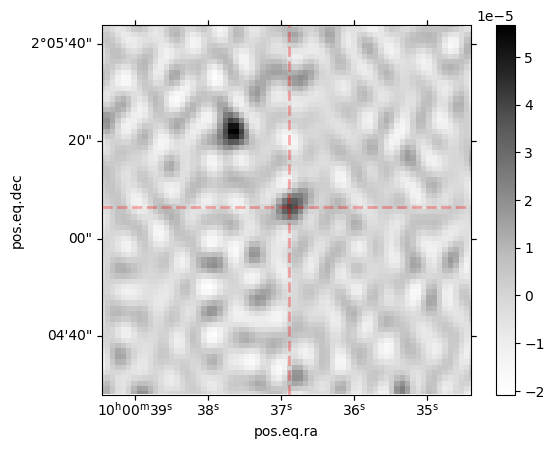

,Name,RA_radio,DEC_radio,ra,dec,S_INT14,Redshift,Redshift_err,Redshift_note,L14,...,VLBAAGN,AGN,SFG,probSFG,unclass,HERG,LERG,probLERG,RQAGN,field
60,J100036.89+020506.4,150.153,2.085,150.154,2.085,0.000059,1.433,0.554,photz,5.750000e+23,...,False,True,False,False,False,False,False,False,True,COSMOS


In [6]:
idx = 60
mightee_data.plot(idx)
mightee_data.df.iloc[idx : idx + 1]

In [7]:
import numpy as np

mu, sigma = np.mean(mightee_data[0]), np.std(mightee_data[0])

In [8]:
# transforms but no pre-processing:

import torchvision.transforms as T

transform = T.Compose(
    [
        T.ToTensor(),
        T.Normalize((mu,), (sigma,)),
    ]
)

mightee_data = CataData(
    catalogue_paths=[catlog_path],
    image_paths=[image_path],
    field_names=['COSMOS'],
    cutout_width=70,
    transform=transform
)

mightee_data.df.rename(mapper={"RA_host":"ra", "DEC_host":"dec"}, axis="columns", inplace=True)

In [9]:
mightee_data[0].shape

torch.Size([1, 70, 70])

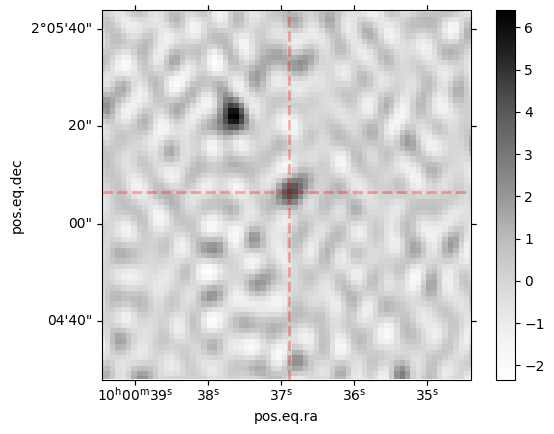

,Name,RA_radio,DEC_radio,ra,dec,S_INT14,Redshift,Redshift_err,Redshift_note,L14,...,VLBAAGN,AGN,SFG,probSFG,unclass,HERG,LERG,probLERG,RQAGN,field
60,J100036.89+020506.4,150.153,2.085,150.154,2.085,0.000059,1.433,0.554,photz,5.750000e+23,...,False,True,False,False,False,False,False,False,True,COSMOS


In [10]:
idx = 60
mightee_data.plot(idx)
mightee_data.df.iloc[idx : idx + 1]

---

In [11]:
# transforms and pre-processing:

from mightee_preprocessing import image_preprocessing

transform = T.Compose(
    [
        T.ToTensor(),
        T.Normalize((0.,), (1.,)),
    ]
)

mightee_data = CataData(
    catalogue_paths=[catlog_path],
    image_paths=[image_path],
    field_names=['COSMOS'],
    cutout_width=70,
    transform=transform,
    image_preprocessing=image_preprocessing
    
)

mightee_data.df.rename(mapper={"RA_host":"ra", "DEC_host":"dec"}, axis="columns", inplace=True)

In [12]:
mightee_data[0].shape

torch.Size([1, 70, 70])

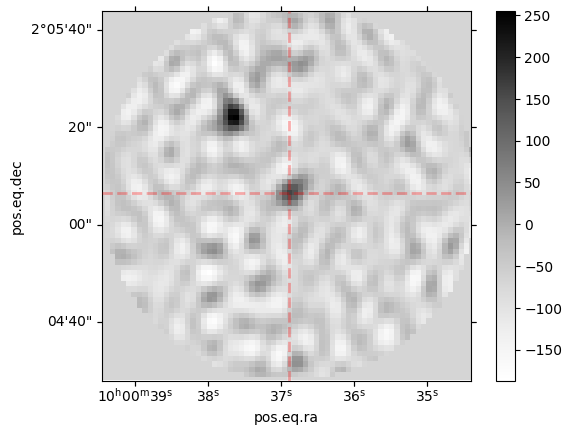

,Name,RA_radio,DEC_radio,ra,dec,S_INT14,Redshift,Redshift_err,Redshift_note,L14,...,VLBAAGN,AGN,SFG,probSFG,unclass,HERG,LERG,probLERG,RQAGN,field
60,J100036.89+020506.4,150.153,2.085,150.154,2.085,0.000059,1.433,0.554,photz,5.750000e+23,...,False,True,False,False,False,False,False,False,True,COSMOS


In [13]:
idx = 60
mightee_data.plot(idx)
mightee_data.df.iloc[idx : idx + 1]